<a href="https://colab.research.google.com/github/AbhiramChikatla/MovieRecommendationSystem/blob/main/MovieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation System

## Objective

To develop a machine learning-based model that recommends movies to users based on their preferences and viewing history.


## Types of Filtering

### Collaborative Filtering

Collaborative filtering predicts user preferences by analyzing patterns in user behavior. It assumes that users who have agreed on movies in the past will continue to do so in the future.

**Example:**
- User A and User B both liked Movie X and Movie Y. If User A likes Movie Z, User B is likely to enjoy Movie Z as well.

### Content-Based Filtering

Content-based filtering recommends movies by comparing the content of movies that a user has enjoyed in the past with other movies' content. It focuses on the attributes of the movies.

**Example:**
- If a user likes sci-fi movies with a strong female lead, the system will recommend other sci-fi movies with similar characteristics.

## Data Source

Utilize movie rating datasets such as the MovieLens dataset, which contains user ratings for a wide array of movies.



# Import Library

In [81]:
import pandas as pd

In [82]:
import numpy as np

# Import Dataset

In [83]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv")

#  Describe Data
- Movie_ID:Unique identifier for each movie.
- Movie_Title:Title of the movie.
- Movie_Genre: Genres associated with the movie.

In [84]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [86]:
df.shape

(4760, 21)

In [87]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

# Data Visualization

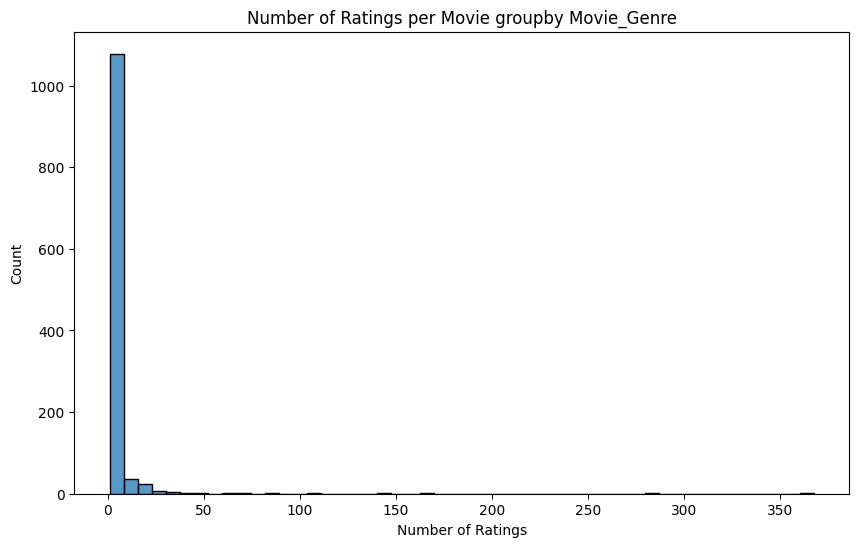

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


ratings_per_movie = df.groupby('Movie_Genre').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.title('Number of Ratings per Movie groupby Movie_Genre')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

In [89]:
df.head(1)


,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.87623,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders


<ipython-input-90-d58f76c5cf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')


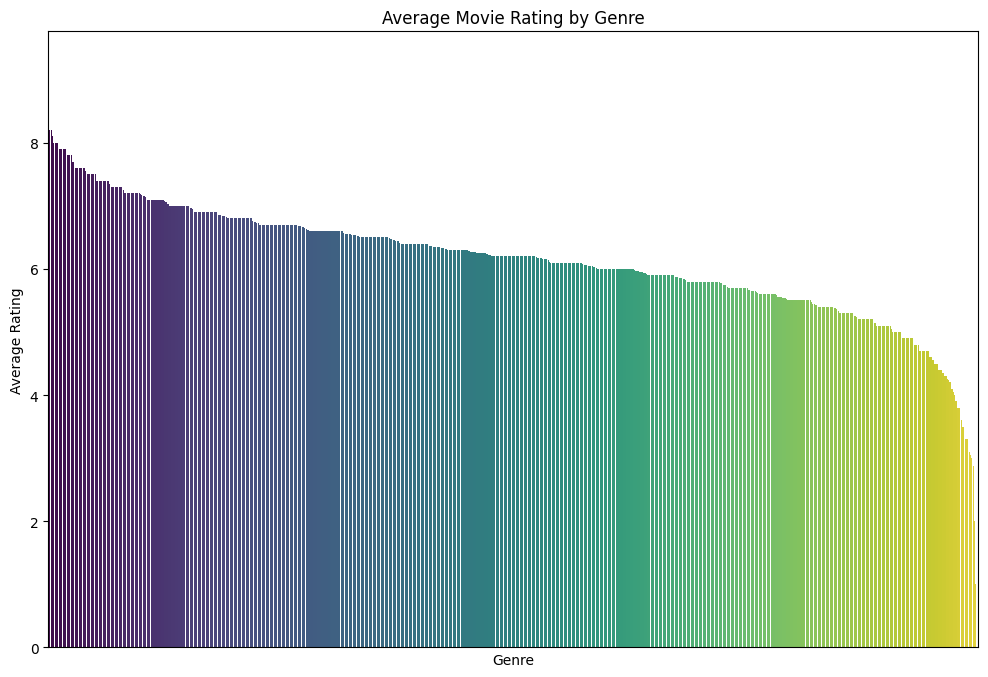

In [90]:
df['Movie_Genre'] = df['Movie_Genre']

genre_popularity = df.groupby('Movie_Genre')['Movie_Vote'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks([])
plt.show()

# Get Feature Selection
## Defining Target Variable (y) and Feature Variables (X)

In [91]:
df_features=df[['Movie_Genre','Movie_Keywords',"Movie_Tagline","Movie_Cast","Movie_Director"]].fillna('')

Selected five existing filters to recommend movies, which can vary by project, such as vote counts, budget, language, and more.

In [92]:
df_features.shape

(4760, 5)

In [93]:
df_features

,Movie_Genre,Movie_Keywords,Movie_Tagline,Movie_Cast,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,George Lucas
2,Animation Family,father son relationship harbor underwater fish...,"There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,"The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,Sam Mendes
...,...,...,...,...,...
4755,Horror,,The hot spot where Satan's waitin'.,Lisa Hart Carroll Michael Des Barres Paul Drak...,Pece Dingo
4756,Comedy Family Drama,,It’s better to stand out than to fit in.,Roni Akurati Brighton Sharbino Jason Lee Anjul...,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,She never knew it could happen to her...,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,Jaco Booyens
4758,Family,,,,


# Data Modeling

In [94]:
X=df_features['Movie_Genre']+ " "+df_features['Movie_Keywords']+ " "+df_features['Movie_Tagline']+ " "+df_features['Movie_Cast']+ " "+df_features['Movie_Director']

In [95]:
X.shape

(4760,)

In [96]:
X

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  The hot spot where Satan's waitin'. Li...
4756    Comedy Family Drama  It’s better to stand out ...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

# Get Feature Text Conversion to Tokens

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
tfidf=TfidfVectorizer()

In [99]:
X=tfidf.fit_transform(X)

In [100]:
X.shape

(4760, 17258)

In [101]:
print(X)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 15413)	0.1465525095337543
  (0, 9675)	0.14226057295252661
  (0, 9465)	0.1659841367820977
  (0, 1390)	0.16898383612799558
  (0, 7825)	0.09799561597509843
  (0, 1214)	0.13865857545144072
  (0, 729)	0.13415063359531618
  (0, 13093)	0.1432591540388685
  (0, 15355)	0.10477815972666779
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	0.07

# Get Similarity Score using Cosine Similarity
## Model Evaluation

cosine_similarity computes the L2-normalized dot product of vectors.Euclidean (L2) normalization projects the vectors onto the unit sphere, and their dot products is then the cosine fo the angle between the points denoted by the vectors.

In [102]:
from sklearn.metrics.pairwise import cosine_similarity

In [103]:
Similarity_score=cosine_similarity(X)

In [104]:
Similarity_score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [105]:
Similarity_score.shape

(4760, 4760)

# Prediction

## Get Movie Name as Input from User and Validate for Closest Spelling

In [106]:
favourite_movie_name=input("Enter your favourite movie name:\n")

Enter your favourite movie name:
starwars


In [107]:
movie_title_list=df["Movie_Title"].tolist()

In [108]:
import difflib

In [109]:
Movie_Recommendation =difflib.get_close_matches(favourite_movie_name,movie_title_list)


In [110]:
print(Movie_Recommendation)

['Star Wars']


In [111]:
close_match=Movie_Recommendation[0]
print(close_match)

Star Wars


In [112]:
index_of_close_match_movie=df[df.Movie_Title==close_match]['Movie_ID'].values[0]
print(index_of_close_match_movie)

2


In [113]:
# getting a list of similar movies
Recommendation_Score=list(enumerate(Similarity_score[index_of_close_match_movie]))
print(Recommendation_Score)

[(0, 0.0357046810425853), (1, 0.00806674385442584), (2, 1.0000000000000004), (3, 0.010521591718659169), (4, 0.0), (5, 0.0), (6, 0.017765821664568825), (7, 0.020459391814520018), (8, 0.0), (9, 0.003691894977938995), (10, 0.017357304877482892), (11, 0.004131279873878878), (12, 0.0042603051915136225), (13, 0.0), (14, 0.0755600401545437), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0038254771243029333), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.030313064953939577), (23, 0.0), (24, 0.043138053214853325), (25, 0.012683619887436534), (26, 0.03985267406354877), (27, 0.035925841296994075), (28, 0.004050565768066834), (29, 0.014601619245802841), (30, 0.016351790950860548), (31, 0.0), (32, 0.009947764091812207), (33, 0.013550651311350111), (34, 0.0), (35, 0.01104363559975108), (36, 0.0), (37, 0.010925836662603832), (38, 0.004559222984603856), (39, 0.00801173739882585), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.023445696195256015), (44, 0.016505753464896276), (45, 0.010891617144621526), (46, 0.0), (47, 0.

In [114]:
len(Recommendation_Score)

4760

# Get All Movies Sort Based on Recommendation Score wrt Favourite Movie

In [115]:
# sorting the movies based on their similarity score
Sorted_similar_movies=sorted(Recommendation_Score,key=lambda x:x[1],reverse=True)
print(Sorted_similar_movies)

[(2, 1.0000000000000004), (1714, 0.1875935306279091), (247, 0.1508193881467258), (3467, 0.14647318067016865), (3162, 0.13915488516680705), (3181, 0.13101873188620575), (709, 0.1283613829617165), (230, 0.12167721115770525), (1473, 0.11824097359319927), (1862, 0.11629897111683916), (3256, 0.11558704877764754), (178, 0.1111468458372592), (2040, 0.10916210938064652), (3390, 0.1073194239226595), (182, 0.10680811738851488), (2647, 0.10610558454863812), (1276, 0.1053435194920348), (4182, 0.10499343399374056), (1834, 0.10460215898310787), (2264, 0.1034495322466014), (1758, 0.1012923348551616), (106, 0.09988059705340357), (1319, 0.0987054551837175), (2135, 0.0984801505547625), (1251, 0.09798035416293525), (2322, 0.09782933850237875), (2897, 0.09714947434738225), (794, 0.09647109437560554), (1182, 0.09527958438829842), (1646, 0.09401965915647889), (1477, 0.09331707969240709), (3660, 0.09156161733706282), (4374, 0.09087169166677278), (2591, 0.09086127146024525), (1886, 0.09022740076397263), (2098

In [116]:
# print the name of similar movies based on the index
print("Top 30 Movies Suggested for you: \n")

i=1
for movie in Sorted_similar_movies:
  index=movie[0]
  title_from_index=df[df.index==index]["Movie_Title"].values[0]
  if i< 31:
    print(i, '.', title_from_index)
    i+=1

Top 30 Movies Suggested for you: 

1 . Finding Nemo
2 . Shark Tale
3 . Big Fish
4 . John Carter
5 . The Muse
6 . Megamind
7 . Mallrats
8 . Spider-Man
9 . Happy Feet
10 . The Last Temptation of Christ
11 . Meet the Deedles
12 . The English Patient
13 . Death Sentence
14 . When Did You Last See Your Father?
15 . The Life Aquatic with Steve Zissou
16 . Flight of the Intruder
17 . El Mariachi
18 . Treading Water
19 . Silent Movie
20 . Bottle Rocket
21 . WALL·E
22 . The Outsiders
23 . He Got Game
24 . Ponyo
25 . American Dreamz
26 . Zoom
27 . Shooting Fish
28 . Bambi
29 . Dear Frankie
30 . Freaky Friday


# Top 10 Movie Recommendation System

In [117]:
Movie_name=input("Enter your favourite movie name:\n")
movie_title_list=df["Movie_Title"].tolist()
find_close_match =difflib.get_close_matches(favourite_movie_name,movie_title_list)

close_match=find_close_match[0]
index_of_close_match_movie=df[df.Movie_Title==close_match]['Movie_ID'].values[0]

Recommendation_Score=list(enumerate(Similarity_score[index_of_close_match_movie]))

Sorted_similar_movies=sorted(Recommendation_Score,key=lambda x:x[1],reverse=True)

print("Top 10 Movies Suggested for you: \n")

i=1
for movie in Sorted_similar_movies:
  index=movie[0]
  title_from_index=df[df.index==index]["Movie_Title"].values[0]
  if i< 11:
    print(i, '.', title_from_index)
    i+=1

Enter your favourite movie name:
starwars
Top 10 Movies Suggested for you: 

1 . Finding Nemo
2 . Shark Tale
3 . Big Fish
4 . John Carter
5 . The Muse
6 . Megamind
7 . Mallrats
8 . Spider-Man
9 . Happy Feet
10 . The Last Temptation of Christ


# Explanation

The movie recommendation system uses two approaches:

1. Collaborative Filtering: Recommends movies based on the preferences of similar users. It identifies users with similar tastes and suggests movies they have enjoyed.
2. Content-Based Filtering: Recommends movies based on the features of the movies themselves. It predicts ratings by analyzing the attributes of movies and the user's past ratings.
By combining these methods, the system can provide accurate and personalized movie recommendations to users.
